# 유치원 수 회귀분석

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

## 독립변수 데이터 추가

In [2]:
df = pd.read_csv('data/new_data/ML_data.csv')
df.head()

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,횡단보도수,육교수,CCTV수,월평균소득금액,평균면적(m^2),면적당 가격(만원/m^2),"주유소,가스충전소 수",공립,사립,공립+사립
0,종로구,사직동,23.0,1.0,2.0,5.0,2.0,6.0,1.0,954.0,...,90.0,0.0,139.0,5.039457e+06,135.0,1231.0,1.0,0.0,2.0,2.0
1,종로구,부암동,2.0,0.0,0.0,6.0,0.0,0.0,1.0,150.0,...,20.0,17.0,144.0,3.661726e+06,74.0,628.0,3.0,0.0,2.0,2.0
2,종로구,평창동,6.0,0.0,0.0,6.0,1.0,3.0,6.0,175.0,...,22.0,6.0,120.0,4.544046e+06,120.0,780.0,3.0,0.0,1.0,1.0
3,용산구,한남동,21.0,0.0,0.0,2.0,1.0,1.0,10.0,364.0,...,73.0,24.0,119.0,4.397761e+06,129.0,1995.0,5.0,1.0,0.0,1.0
4,성동구,왕십리2동,42.0,0.0,0.0,0.0,0.0,2.0,18.0,376.0,...,10.0,5.0,222.0,3.487692e+06,61.0,1273.0,0.0,1.0,1.0,2.0


인구수 데이터 추가 필요  
행정동별 20~30대 인구수와, 10세 미만 인구 데이터 추가

### 20,30대 상주인구 변수 추가

In [3]:
df_age = pd.read_csv('data/raw_data/가중치선정/서울시 상권분석서비스(상주인구-행정동).csv', encoding='ansi')
df_age.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,...,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
0,20191,11110515,청운효자동,13047,6111,6936,2248,1648,1879,2304,...,1235,1052,821,1020,1283,1062,1698,5384,314,5070
1,20191,11110530,사직동,9224,4169,5055,1387,1095,1383,1558,...,1021,697,603,781,856,810,1308,4352,163,4189
2,20191,11110540,삼청동,2831,1344,1487,340,336,422,399,...,383,156,171,220,201,253,486,1413,0,1413
3,20191,11110550,부암동,10055,4850,5205,1490,1394,1277,1647,...,1137,689,633,672,905,909,1397,4243,74,4169
4,20191,11110560,평창동,18615,8775,9840,3018,2691,2303,2848,...,1976,1472,1272,1231,1592,1757,2516,7463,459,7004


In [4]:
df_age['기준_년분기_코드'].unique()

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20224, 20231, 20232, 20233,
       20223], dtype=int64)

In [5]:
df_age.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수',
       '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수', '연령대_40_상주인구_수',
       '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '남성연령대_10_상주인구_수',
       '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수',
       '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수',
       '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수',
       '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수', '아파트_가구_수',
       '비_아파트_가구_수'],
      dtype='object')

In [6]:
df_age = df_age[['행정동_코드_명', '연령대_20_상주인구_수', '연령대_30_상주인구_수']]
df_age

,행정동_코드_명,연령대_20_상주인구_수,연령대_30_상주인구_수
0,청운효자동,1648,1879
1,사직동,1095,1383
2,삼청동,336,422
3,부암동,1394,1277
4,평창동,2691,2303
...,...,...,...
8049,성내2동,2141,4218
8050,성내3동,2585,3613
8051,길동,4863,7779
8052,둔촌1동,5,2


In [7]:
df_age = df_age.groupby('행정동_코드_명').mean().reset_index().rename(columns = {'행정동_코드_명':'행정동'})

In [8]:
df_age.head()

,행정동,연령대_20_상주인구_수,연령대_30_상주인구_수
0,가락1동,2332.894737,3448.157895
1,가락2동,4593.578947,4869.947368
2,가락본동,4105.421053,4820.947368
3,가리봉동,1258.789474,1235.578947
4,가산동,4915.789474,5092.368421


In [9]:
df_age['행정동'] = df_age['행정동'].str.replace('?','·')

C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\2611137812.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_age['행정동'] = df_age['행정동'].str.replace('?','·')


1. 상일동은 상일1동, 상일 2동으로 분리되어야 함  
2. 개포3동의 값이 누락됨

In [10]:
df_age[df_age['행정동'].str.contains('상일')]

,행정동,연령대_20_상주인구_수,연령대_30_상주인구_수
185,상일동,2309.263158,2993.421053


In [11]:
df_age[df_age['행정동'].str.contains('개포')]

,행정동,연령대_20_상주인구_수,연령대_30_상주인구_수
15,개포1동,928.000000,791.105263
16,개포2동,2672.000000,2357.000000
17,개포4동,2828.473684,3105.894737


In [12]:
new_row1 = {'행정동': '상일1동', '연령대_20_상주인구_수': 2309/2, '연령대_30_상주인구_수': 2993/2}
new_row2 = {'행정동': '상일2동', '연령대_20_상주인구_수': 2309/2, '연령대_30_상주인구_수': 2993/2}
new_row3 = {'행정동': '개포3동', '연령대_20_상주인구_수': (928+2672+2828)/3, '연령대_30_상주인구_수': (791+2357+3105)/3} #개포동 평균으로 대치

# 새로운 행 추가
df_age = df_age.append(new_row1, ignore_index=True)
df_age = df_age.append(new_row2, ignore_index=True)
df_age = df_age.append(new_row3, ignore_index=True)

C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\3279170359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_age = df_age.append(new_row1, ignore_index=True)
C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\3279170359.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_age = df_age.append(new_row2, ignore_index=True)
C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\3279170359.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_age = df_age.append(new_row3, ignore_index=True)


In [13]:
# df_age.to_csv('data/raw_data/가중치선정/완료/8_추가_행정동별 2030인구.csv', index = False)

### 10세 미만 어린이 인구 추가

In [14]:
df_baby = pd.read_csv('data/raw_data/서울특별시 _연령별인구현황_20231231.csv')
df_baby.head()

,동별(1),동별(2),항목,2023 4/4,2023 4/4.1
0,동별(1),동별(2),항목,0~4세,5~9세
1,종로구,소계,한국인,2342,3577
2,종로구,사직동,한국인,174,288
3,종로구,삼청동,한국인,28,58
4,종로구,부암동,한국인,118,263


In [15]:
df_baby = df_baby.iloc[1:]
df_baby.head()

,동별(1),동별(2),항목,2023 4/4,2023 4/4.1
1,종로구,소계,한국인,2342,3577
2,종로구,사직동,한국인,174,288
3,종로구,삼청동,한국인,28,58
4,종로구,부암동,한국인,118,263
5,종로구,평창동,한국인,397,599


In [16]:
df_baby = df_baby.drop(columns=['동별(1)','항목']).rename(columns = {'동별(2)':'행정동', '2023 4/4':'0~4세', '2023 4/4.1':'5~9세'})
df_baby

,행정동,0~4세,5~9세
1,소계,2342,3577
2,사직동,174,288
3,삼청동,28,58
4,부암동,118,263
5,평창동,397,599
...,...,...,...
447,천호2동,705,742
448,길동,900,1110
449,강일동,1461,1625
450,상일1동,1552,2965


In [17]:
df_baby = df_baby[df_baby['행정동'] != '소계'].reset_index(drop = True)
df_baby

,행정동,0~4세,5~9세
0,사직동,174,288
1,삼청동,28,58
2,부암동,118,263
3,평창동,397,599
4,무악동,193,353
...,...,...,...
421,천호2동,705,742
422,길동,900,1110
423,강일동,1461,1625
424,상일1동,1552,2965


In [18]:
df_baby[df_baby['0~4세'] == '-']

,행정동,0~4세,5~9세
418,둔촌1동,-,1


In [19]:
df_baby[df_baby['5~9세'] == '-']

,행정동,0~4세,5~9세


In [20]:
df_baby = df_baby[df_baby['행정동'] != '둔촌1동']

In [21]:
df_baby['0~4세'] = df_baby['0~4세'].astype('int')
df_baby['5~9세'] = df_baby['5~9세'].astype('int')

C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\3527395296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baby['0~4세'] = df_baby['0~4세'].astype('int')
C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\3527395296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baby['5~9세'] = df_baby['5~9세'].astype('int')


In [22]:
df_baby['0~9세'] = df_baby['0~4세'] + df_baby['5~9세']
df_baby

C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\343180238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baby['0~9세'] = df_baby['0~4세'] + df_baby['5~9세']


,행정동,0~4세,5~9세,0~9세
0,사직동,174,288,462
1,삼청동,28,58,86
2,부암동,118,263,381
3,평창동,397,599,996
4,무악동,193,353,546
...,...,...,...,...
421,천호2동,705,742,1447
422,길동,900,1110,2010
423,강일동,1461,1625,3086
424,상일1동,1552,2965,4517


In [23]:
df_baby['행정동'] = df_baby['행정동'].str.replace('.','·')

C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\3397573910.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_baby['행정동'] = df_baby['행정동'].str.replace('.','·')
C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\3397573910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baby['행정동'] = df_baby['행정동'].str.replace('.','·')


In [24]:
# df_baby.to_csv('data/raw_data/가중치선정/완료/9_추가_행정동별 10세미만 인구.csv', index = False)

In [25]:
df.head()

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,횡단보도수,육교수,CCTV수,월평균소득금액,평균면적(m^2),면적당 가격(만원/m^2),"주유소,가스충전소 수",공립,사립,공립+사립
0,종로구,사직동,23.0,1.0,2.0,5.0,2.0,6.0,1.0,954.0,...,90.0,0.0,139.0,5.039457e+06,135.0,1231.0,1.0,0.0,2.0,2.0
1,종로구,부암동,2.0,0.0,0.0,6.0,0.0,0.0,1.0,150.0,...,20.0,17.0,144.0,3.661726e+06,74.0,628.0,3.0,0.0,2.0,2.0
2,종로구,평창동,6.0,0.0,0.0,6.0,1.0,3.0,6.0,175.0,...,22.0,6.0,120.0,4.544046e+06,120.0,780.0,3.0,0.0,1.0,1.0
3,용산구,한남동,21.0,0.0,0.0,2.0,1.0,1.0,10.0,364.0,...,73.0,24.0,119.0,4.397761e+06,129.0,1995.0,5.0,1.0,0.0,1.0
4,성동구,왕십리2동,42.0,0.0,0.0,0.0,0.0,2.0,18.0,376.0,...,10.0,5.0,222.0,3.487692e+06,61.0,1273.0,0.0,1.0,1.0,2.0


In [26]:
df = pd.merge(pd.merge(df, df_age, on = '행정동', how = 'left'), df_baby, on='행정동', how='left')
df.head()

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,면적당 가격(만원/m^2),"주유소,가스충전소 수",공립,사립,공립+사립,연령대_20_상주인구_수,연령대_30_상주인구_수,0~4세,5~9세,0~9세
0,종로구,사직동,23.0,1.0,2.0,5.0,2.0,6.0,1.0,954.0,...,1231.0,1.0,0.0,2.0,2.0,1115.631579,1360.473684,174,288,462
1,종로구,부암동,2.0,0.0,0.0,6.0,0.0,0.0,1.0,150.0,...,628.0,3.0,0.0,2.0,2.0,1346.000000,1240.684211,118,263,381
2,종로구,평창동,6.0,0.0,0.0,6.0,1.0,3.0,6.0,175.0,...,780.0,3.0,0.0,1.0,1.0,2484.578947,2256.263158,397,599,996
3,용산구,한남동,21.0,0.0,0.0,2.0,1.0,1.0,10.0,364.0,...,1995.0,5.0,1.0,0.0,1.0,2474.842105,3889.157895,487,540,1027
4,성동구,왕십리2동,42.0,0.0,0.0,0.0,0.0,2.0,18.0,376.0,...,1273.0,0.0,1.0,1.0,2.0,2402.315789,2930.894737,530,523,1053


### 행정동별 출생인구수 변수 추가

In [27]:
df_born = pd.read_csv('data/raw_data/가중치선정/완료/9_추가_행정동별 출생인구수.csv')
df_born

,자치구,행정동,23년 출생인구
0,종로구,사직동,25
1,종로구,삼청동,6
2,종로구,부암동,20
3,종로구,평창동,66
4,종로구,무악동,31
...,...,...,...
421,강동구,천호2동,177
422,강동구,길동,200
423,강동구,강일동,169
424,강동구,상일1동,244


In [28]:
df_born = df_born[['행정동', '23년 출생인구']]
df_born.head()

,행정동,23년 출생인구
0,사직동,25
1,삼청동,6
2,부암동,20
3,평창동,66
4,무악동,31


In [29]:
df_born['행정동'] = df_born['행정동'].str.replace('.','·')

C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\2189917570.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_born['행정동'] = df_born['행정동'].str.replace('.','·')
C:\Users\yju12\AppData\Local\Temp\ipykernel_20156\2189917570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_born['행정동'] = df_born['행정동'].str.replace('.','·')


In [30]:
df = pd.merge(df, df_born, on = '행정동', how = 'left')
df.head()

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,"주유소,가스충전소 수",공립,사립,공립+사립,연령대_20_상주인구_수,연령대_30_상주인구_수,0~4세,5~9세,0~9세,23년 출생인구
0,종로구,사직동,23.0,1.0,2.0,5.0,2.0,6.0,1.0,954.0,...,1.0,0.0,2.0,2.0,1115.631579,1360.473684,174,288,462,25
1,종로구,부암동,2.0,0.0,0.0,6.0,0.0,0.0,1.0,150.0,...,3.0,0.0,2.0,2.0,1346.000000,1240.684211,118,263,381,20
2,종로구,평창동,6.0,0.0,0.0,6.0,1.0,3.0,6.0,175.0,...,3.0,0.0,1.0,1.0,2484.578947,2256.263158,397,599,996,66
3,용산구,한남동,21.0,0.0,0.0,2.0,1.0,1.0,10.0,364.0,...,5.0,1.0,0.0,1.0,2474.842105,3889.157895,487,540,1027,114
4,성동구,왕십리2동,42.0,0.0,0.0,0.0,0.0,2.0,18.0,376.0,...,0.0,1.0,1.0,2.0,2402.315789,2930.894737,530,523,1053,104


In [31]:
df.columns

Index(['자치구', '행정동', '유해업소수', '대형쇼핑몰수', '도서관수', '미술관 박물관 극장수',
       '의료시설수(병원,의원,보건소,보건지소)', '공원 수', '경로당 수', '보육시설정원', '보육시설현원', '보육시설포화도',
       '횡단보도수', '육교수', 'CCTV수', '월평균소득금액', '평균면적(m^2)', '면적당 가격(만원/m^2)',
       '주유소,가스충전소 수', '공립', '사립', '공립+사립', '연령대_20_상주인구_수', '연령대_30_상주인구_수',
       '0~4세', '5~9세', '0~9세', '23년 출생인구'],
      dtype='object')

In [32]:
df['2030_상주인구수'] = df['연령대_20_상주인구_수'] + df['연령대_30_상주인구_수']
df.drop(columns = ['연령대_20_상주인구_수', '연령대_30_상주인구_수', '0~4세', '5~9세'], inplace=True)

In [33]:
df = df[['자치구', '행정동', '유해업소수', '대형쇼핑몰수', '도서관수', '미술관 박물관 극장수',
       '의료시설수(병원,의원,보건소,보건지소)', '공원 수', '경로당 수', '보육시설정원', '보육시설현원', '보육시설포화도',
       '횡단보도수', '육교수', 'CCTV수', '월평균소득금액', '평균면적(m^2)', '면적당 가격(만원/m^2)',
       '주유소,가스충전소 수', '0~9세', '2030_상주인구수', '23년 출생인구', '공립', '사립', '공립+사립']]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   자치구                    420 non-null    object 
 1   행정동                    420 non-null    object 
 2   유해업소수                  420 non-null    float64
 3   대형쇼핑몰수                 420 non-null    float64
 4   도서관수                   420 non-null    float64
 5   미술관 박물관 극장수            420 non-null    float64
 6   의료시설수(병원,의원,보건소,보건지소)  420 non-null    float64
 7   공원 수                   420 non-null    float64
 8   경로당 수                  420 non-null    float64
 9   보육시설정원                 420 non-null    float64
 10  보육시설현원                 420 non-null    float64
 11  보육시설포화도                420 non-null    float64
 12  횡단보도수                  420 non-null    float64
 13  육교수                    420 non-null    float64
 14  CCTV수                  420 non-null    float64
 15  월평균소득금

In [35]:
def float_to_int(df):
    for column in df.columns:
        if column != '보육시설포화도':
            if df[column].dtype == 'float64':  # 데이터형이 float인 경우
                df[column] = df[column].astype(int)  # int형으로 변환
    return df

float_to_int(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   자치구                    420 non-null    object 
 1   행정동                    420 non-null    object 
 2   유해업소수                  420 non-null    int32  
 3   대형쇼핑몰수                 420 non-null    int32  
 4   도서관수                   420 non-null    int32  
 5   미술관 박물관 극장수            420 non-null    int32  
 6   의료시설수(병원,의원,보건소,보건지소)  420 non-null    int32  
 7   공원 수                   420 non-null    int32  
 8   경로당 수                  420 non-null    int32  
 9   보육시설정원                 420 non-null    int32  
 10  보육시설현원                 420 non-null    int32  
 11  보육시설포화도                420 non-null    float64
 12  횡단보도수                  420 non-null    int32  
 13  육교수                    420 non-null    int32  
 14  CCTV수                  420 non-null    int32  
 15  월평균소득금

In [36]:
df.describe()

,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,보육시설현원,보육시설포화도,...,월평균소득금액,평균면적(m^2),면적당 가격(만원/m^2),"주유소,가스충전소 수",0~9세,2030_상주인구수,23년 출생인구,공립,사립,공립+사립
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,...,4.200000e+02,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,15.526190,2.040476,0.485714,0.354762,2.021429,3.421429,8.457143,530.302381,397.302381,0.743881,...,3.400667e+06,77.490476,1166.119048,1.652381,1218.935714,6730.319048,96.490476,0.707143,1.516667,2.223810
std,27.570379,3.146507,0.627368,1.085971,3.088514,2.822686,5.492505,290.853639,224.127524,0.107672,...,9.530070e+05,18.822685,480.130382,1.824814,769.034710,2868.424798,55.357139,0.864272,1.267252,1.626864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.111754e+06,23.000000,445.000000,0.000000,59.000000,459.000000,5.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,341.000000,253.500000,0.680000,...,2.698554e+06,68.000000,850.000000,0.000000,680.500000,4758.750000,58.000000,0.000000,1.000000,1.000000
50%,6.000000,1.000000,0.000000,0.000000,1.000000,3.000000,7.000000,482.000000,370.500000,0.760000,...,3.122810e+06,75.000000,1045.000000,1.000000,1031.000000,6396.500000,88.500000,1.000000,1.000000,2.000000
75%,16.250000,2.250000,1.000000,0.000000,2.000000,5.000000,11.000000,666.500000,495.500000,0.820000,...,3.865342e+06,82.000000,1342.250000,2.000000,1560.000000,8292.500000,123.000000,1.000000,2.000000,3.000000
max,289.000000,27.000000,3.000000,13.000000,25.000000,21.000000,35.000000,2867.000000,1868.000000,0.970000,...,7.464364e+06,172.000000,3374.000000,12.000000,6382.000000,18770.000000,335.000000,5.000000,8.000000,10.000000


In [37]:
# df.to_csv('EDA용.csv', index = False)

## EDA

### 데이터 분포 확인

In [246]:
df.columns

Index(['자치구', '행정동', '유해업소수', '대형쇼핑몰수', '도서관수', '미술관 박물관 극장수',
       '의료시설수(병원,의원,보건소,보건지소)', '공원 수', '경로당 수', '보육시설정원', '보육시설현원', '보육시설포화도',
       '횡단보도수', '육교수', 'CCTV수', '월평균소득금액', '평균면적(m^2)', '면적당 가격(만원/m^2)',
       '주유소,가스충전소 수', '0~9세', '2030_상주인구수', '23년 출생인구', '공립', '사립', '공립+사립'],
      dtype='object')

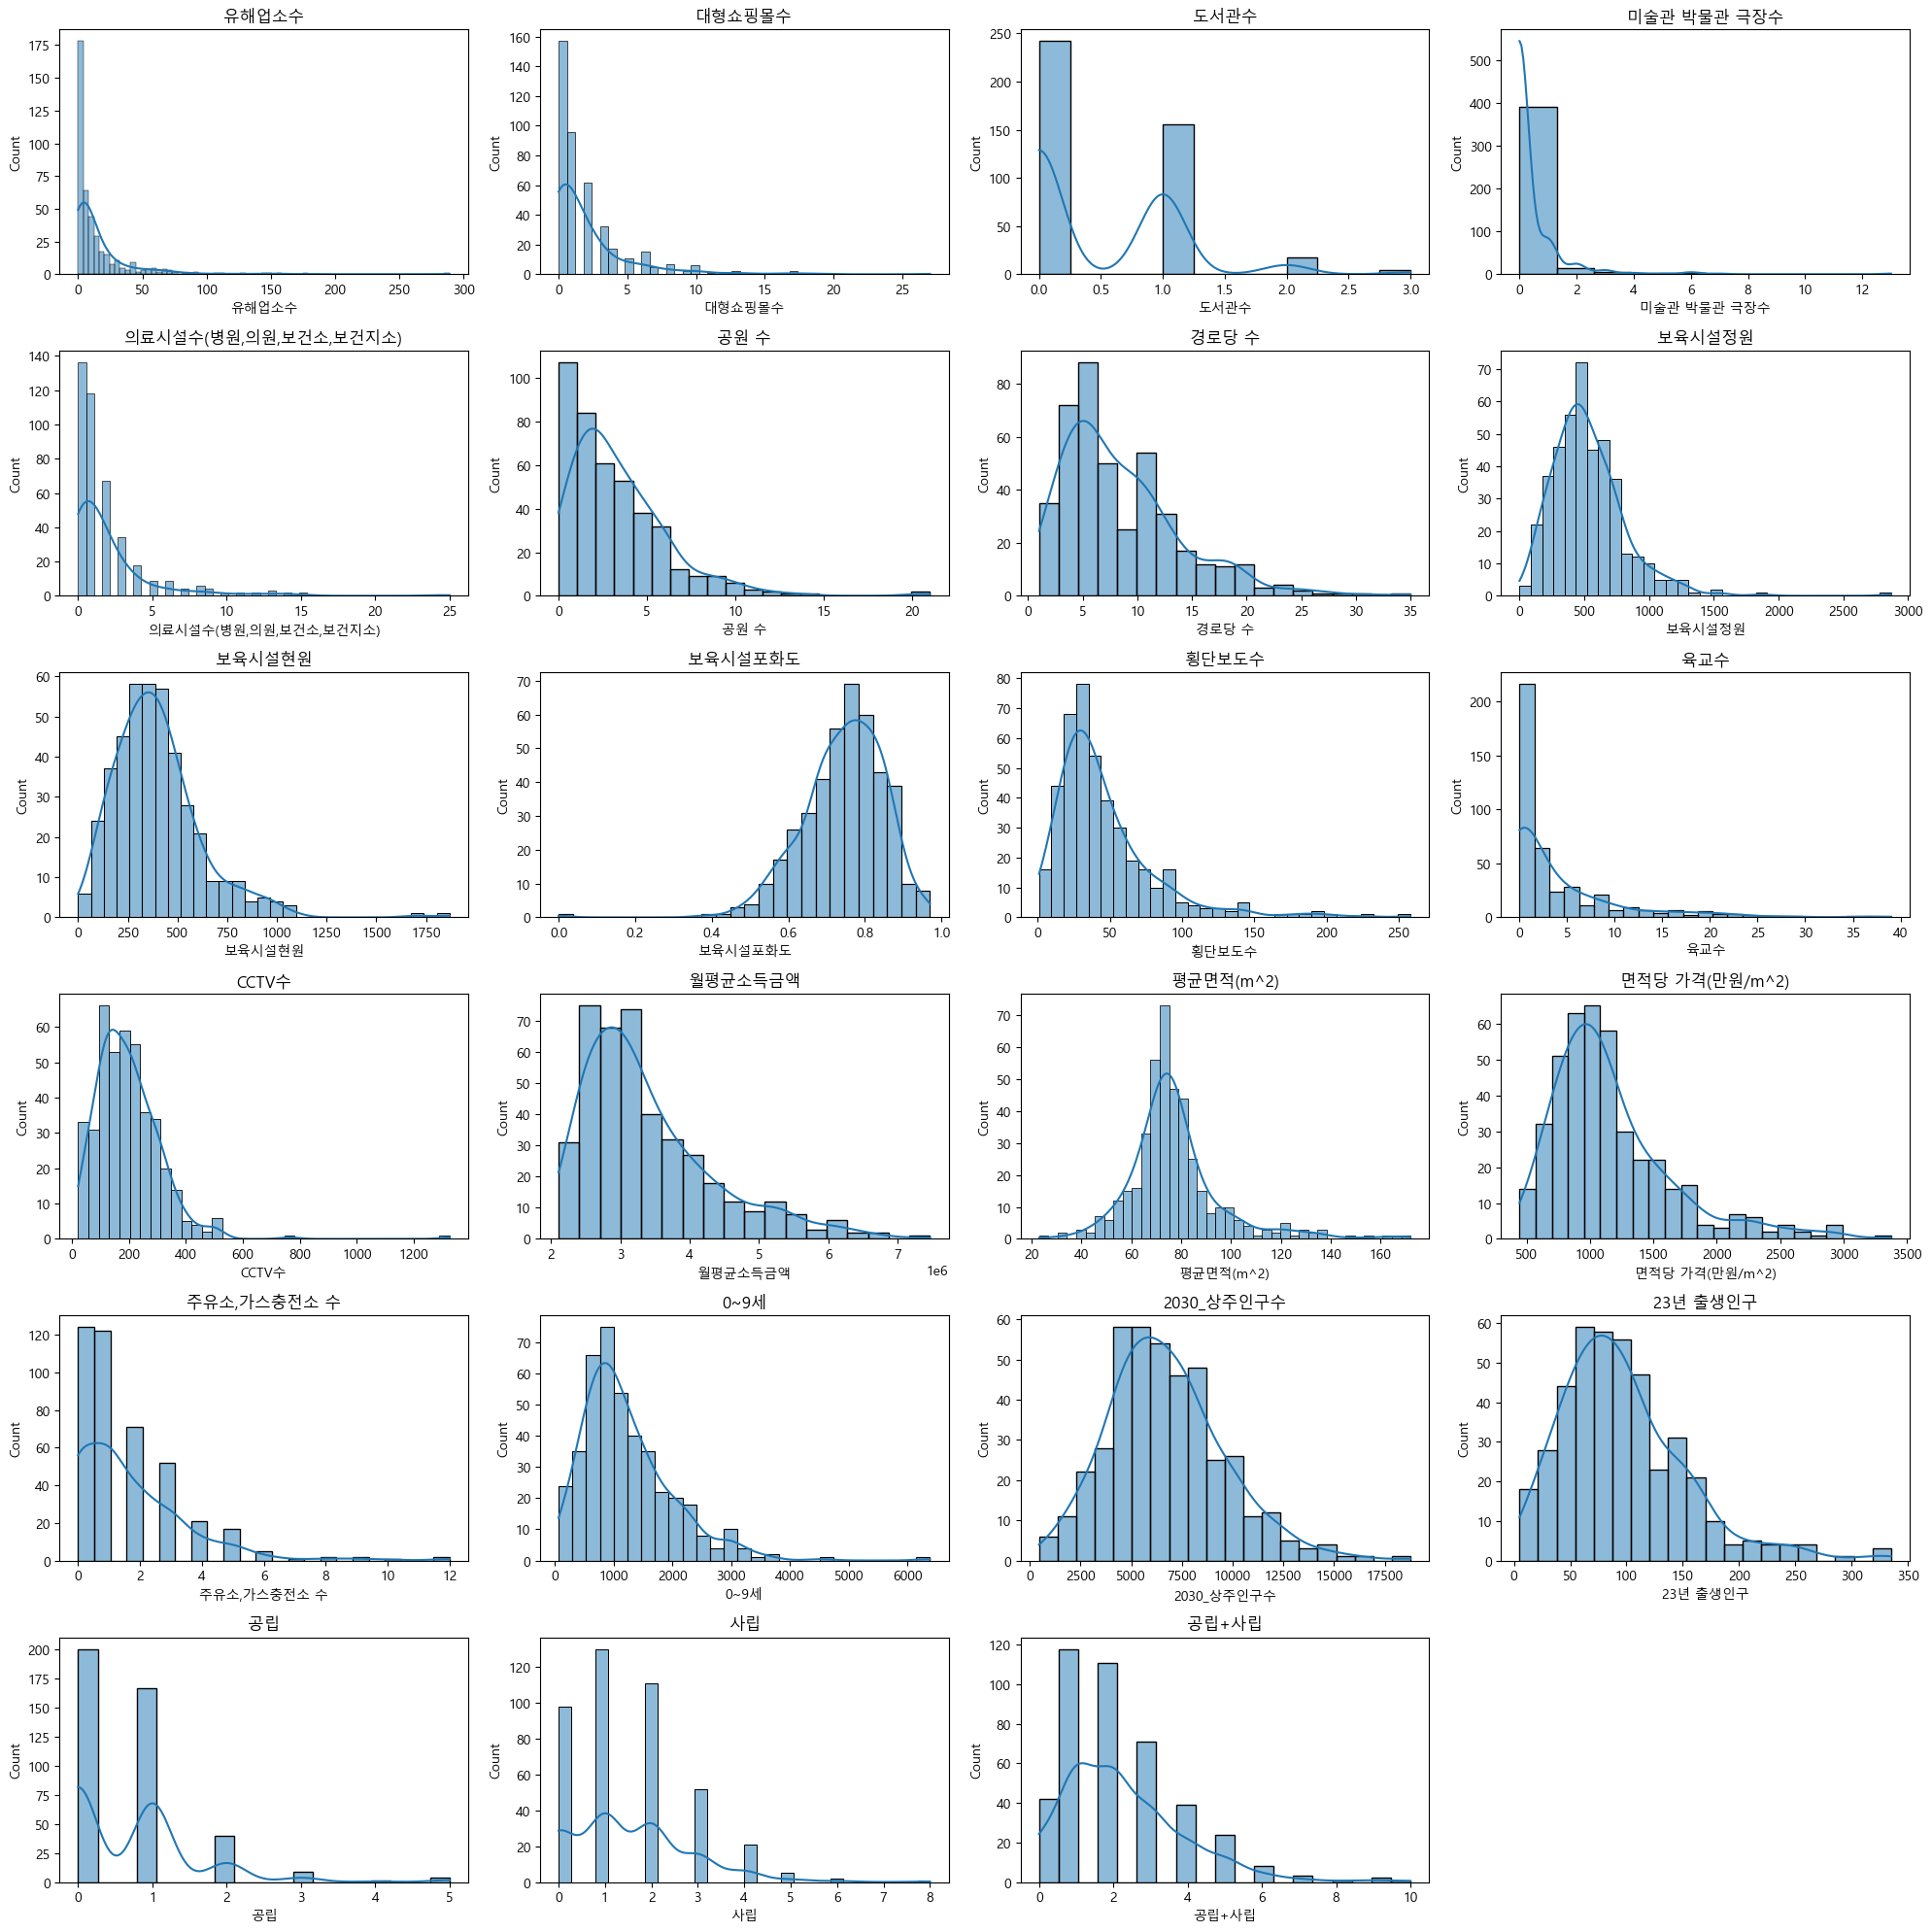

In [247]:
selected_columns = ['유해업소수', '대형쇼핑몰수','도서관수', '미술관 박물관 극장수', '의료시설수(병원,의원,보건소,보건지소)', 
                    '공원 수', '경로당 수', '보육시설정원', '보육시설현원', '보육시설포화도', '횡단보도수', '육교수', 'CCTV수', '월평균소득금액', 
                    '평균면적(m^2)', '면적당 가격(만원/m^2)', '주유소,가스충전소 수', '0~9세', '2030_상주인구수', '23년 출생인구', '공립', '사립', '공립+사립']

selected_data = df[selected_columns]

# 서브플롯 그리기
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))  
axes = axes.flatten()  

for i, column in enumerate(selected_columns):
    sns.histplot(df[column], ax=axes[i], kde=True)  
    axes[i].set_title(column)  


for j in range(len(selected_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- 0값이 많은 데이터 확인

In [248]:
chk_lst = df.columns

for col in chk_lst:
    cnt = len(df[df[col] == 0])
    print(f"{col} 0값 개수 : {cnt}")

자치구 0값 개수 : 0
행정동 0값 개수 : 0
유해업소수 0값 개수 : 76
대형쇼핑몰수 0값 개수 : 157
도서관수 0값 개수 : 242
미술관 박물관 극장수 0값 개수 : 341
의료시설수(병원,의원,보건소,보건지소) 0값 개수 : 136
공원 수 0값 개수 : 37
경로당 수 0값 개수 : 0
보육시설정원 0값 개수 : 1
보육시설현원 0값 개수 : 1
보육시설포화도 0값 개수 : 1
횡단보도수 0값 개수 : 0
육교수 0값 개수 : 193
CCTV수 0값 개수 : 0
월평균소득금액 0값 개수 : 0
평균면적(m^2) 0값 개수 : 0
면적당 가격(만원/m^2) 0값 개수 : 0
주유소,가스충전소 수 0값 개수 : 124
0~9세 0값 개수 : 0
2030_상주인구수 0값 개수 : 0
23년 출생인구 0값 개수 : 0
공립 0값 개수 : 200
사립 0값 개수 : 98
공립+사립 0값 개수 : 42


- 0값이 100개 이상(100개근접 포함)인 컬럼  
대형쇼핑몰수, 도서관수, 미술관/박물관/극장수, 의료시설수, 육교수, 주유소, 가스충전소수, 공립, 사립  

In [249]:
# 가설 설정 : 공립, 사립유치원이 모두 0인 행정동은 
# 1. 유해업소가 많고 -> 맞음
# 2. 0~9세 인구수가 적고 -> 맞음
# 3. 보육시설 정원도 적을 것 -> 맞음
# 4. 공원수도 적을 것? -> 맞음 

In [250]:
df[df['공립+사립'] == 0].describe()[['유해업소수', '0~9세', '보육시설정원', '공원 수']]

,유해업소수,0~9세,보육시설정원,공원 수
count,42.000000,42.000000,42.000000,42.000000
mean,21.500000,777.642857,420.952381,2.619048
std,33.764789,567.865916,232.409012,2.185901
min,0.000000,59.000000,106.000000,0.000000
25%,2.250000,442.500000,210.500000,1.000000
50%,8.000000,676.500000,369.000000,2.000000
75%,24.750000,946.750000,621.250000,4.000000
max,156.000000,2932.000000,905.000000,9.000000


In [251]:
df[df['공립+사립'] != 0].describe()[['유해업소수', '0~9세', '보육시설정원', '공원 수']]

,유해업소수,0~9세,보육시설정원,공원 수
count,378.000000,378.000000,378.000000,378.000000
mean,14.862434,1267.968254,542.452381,3.510582
std,26.765751,773.385972,294.390850,2.873301
min,0.000000,107.000000,0.000000,0.000000
25%,1.000000,725.750000,360.250000,2.000000
50%,6.000000,1089.500000,490.000000,3.000000
75%,16.000000,1629.750000,672.000000,5.000000
max,289.000000,6382.000000,2867.000000,21.000000


In [252]:
# 유치원 수가 3분위수 이상인 데이터 확인 
df[df['공립+사립'] >= df['공립+사립'].quantile(0.75)].describe()[['유해업소수', '0~9세', '보육시설정원', '공원 수']]

,유해업소수,0~9세,보육시설정원,공원 수
count,149.000000,149.000000,149.000000,149.000000
mean,11.932886,1608.456376,655.087248,4.362416
std,21.795941,878.359993,349.783445,3.553101
min,0.000000,401.000000,93.000000,0.000000
25%,0.000000,965.000000,435.000000,2.000000
50%,5.000000,1413.000000,606.000000,4.000000
75%,13.000000,2039.000000,771.000000,6.000000
max,179.000000,6382.000000,2867.000000,21.000000


### 변수 선택

- 상관계수 확인

C:\Users\yju12\AppData\Local\Temp\ipykernel_12380\1168195172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
c:\Users\yju12\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\yju12\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


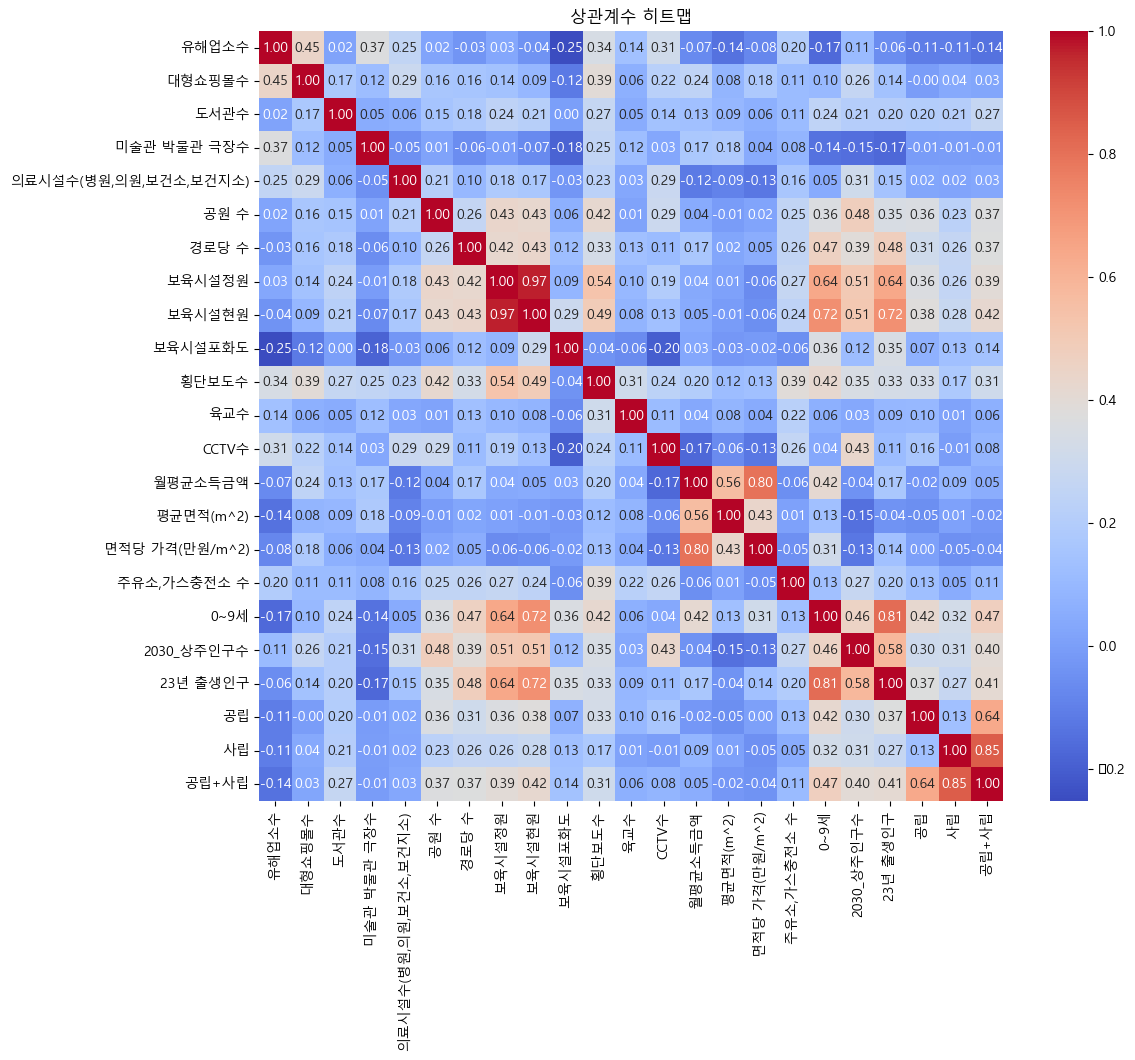

In [253]:
# 상관계수 확인
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관계수 히트맵')
plt.show()

1. 대형쇼핑몰수, 미술관/박물관/극장수 : 0값이 많고, 유해업소수와 상관관계가 높아 다중공선성의 우려.. drop
2. 육교수 : 대체가능한 '횡단보도수'가 있으므로 .. drop
3. 경로당수, 주유소,가스충전소 수 : 유치원 설립의 법적 요건에 해당하므로(반경 50이내 설치불가) QGIS 입지선정시 활용하는것이 좋아보임
    - 경로당의 경우 유치원 입지 요건과 비슷한 경향이 있어 상관계수가 높게 나온것으로 생각..
4. 의료시설수 : 인구수가 많고, 접근성이 좋은곳에 설치되었을 가능성이 높은듯 함. 유치원입지와 큰 상관은 없어보임
5. 보육시설정원/현원 : 의료시설과 마찬가지로 인구수에 영향이 큰 듯. QGIS 입지선정시 활용하는것이 좋아보임
    - 파생변수인 '보육시설포화도'를 활용하는것이 좋은듯함
6. 아파트 평균면적, 면적당가격 : 월 평균소득금액으로 대체 가능..drop

In [254]:
df.drop(columns = ['대형쇼핑몰수', '미술관 박물관 극장수', '육교수', '경로당 수', '주유소,가스충전소 수', 
                    '의료시설수(병원,의원,보건소,보건지소)', '보육시설정원', '보육시설현원', '평균면적(m^2)', '면적당 가격(만원/m^2)'], inplace=True)
df.columns

Index(['자치구', '행정동', '유해업소수', '도서관수', '공원 수', '보육시설포화도', '횡단보도수', 'CCTV수',
       '월평균소득금액', '0~9세', '2030_상주인구수', '23년 출생인구', '공립', '사립', '공립+사립'],
      dtype='object')

## 데이터 정규성 확인

### 기존데이터 확인

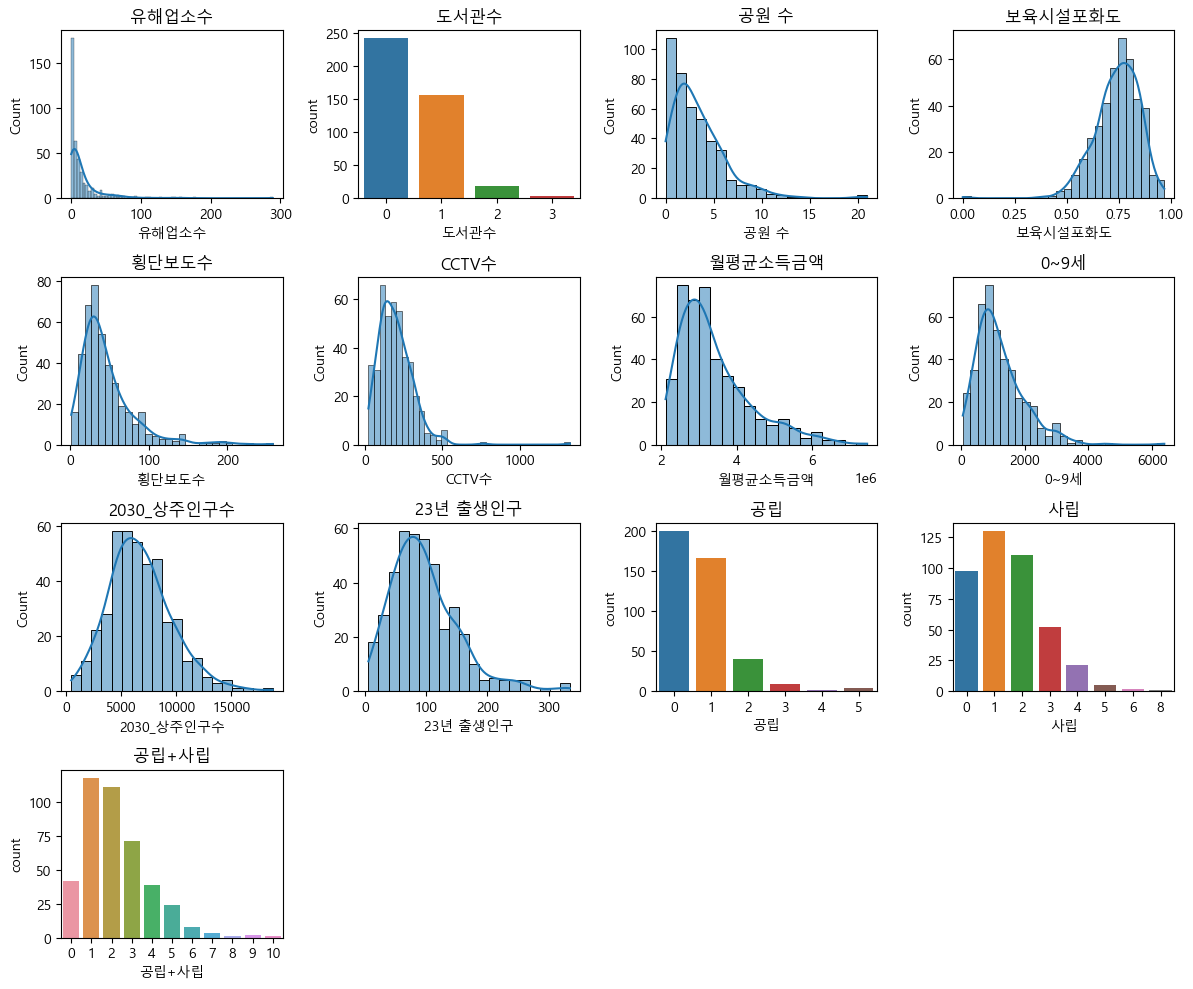

In [255]:
# 스케일링 전 데이터 확인

selected_columns = ['유해업소수', '도서관수', '공원 수', '보육시설포화도', '횡단보도수', 'CCTV수', 
                    '월평균소득금액', '0~9세', '2030_상주인구수', '23년 출생인구', '공립', '사립', '공립+사립']

def make_plot(df, selected_columns):
    selected_data = df[selected_columns]

    # 서브플롯 그리기
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))  
    axes = axes.flatten()  

    for i, column in enumerate(selected_columns):
        # -도서관수, 공립, 사립, 공립+사립은 이산형 변수에 가까워 countplot으로 생성
        if column in ['도서관수', '공립', '사립', '공립+사립']:
            sns.countplot(x=df[column], ax=axes[i])
        else:
            sns.histplot(df[column], ax=axes[i], kde=True)  
        axes[i].set_title(column)  

    for j in range(len(selected_columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

make_plot(df, selected_columns)

In [256]:
from scipy.stats import normaltest

def norm_test(df,col_list):
    for col in col_list:
        statistic, p_value = normaltest(df[col])

        print(f"{col} 정규성검정")
        if p_value > 0.05:
            print(f"[p_value: {p_value:.4f}], [검정통계량: {statistic:.4f}] : 정규분포 O\n")
        else:
            print(f"[p_value: {p_value:.4f}], [검정통계량: {statistic:.4f}] : 정규분포 X\n")

In [257]:
col_list = ['유해업소수', '공원 수', '보육시설포화도', '횡단보도수', 'CCTV수', '월평균소득금액', '0~9세', '2030_상주인구수', '23년 출생인구']

norm_test(df, col_list)

유해업소수 정규성검정
[p_value: 0.0000], [검정통계량: 426.1838] : 정규분포 X

공원 수 정규성검정
[p_value: 0.0000], [검정통계량: 182.8102] : 정규분포 X

보육시설포화도 정규성검정
[p_value: 0.0000], [검정통계량: 116.4345] : 정규분포 X

횡단보도수 정규성검정
[p_value: 0.0000], [검정통계량: 222.4799] : 정규분포 X

CCTV수 정규성검정
[p_value: 0.0000], [검정통계량: 308.5901] : 정규분포 X

월평균소득금액 정규성검정
[p_value: 0.0000], [검정통계량: 94.1512] : 정규분포 X

0~9세 정규성검정
[p_value: 0.0000], [검정통계량: 156.8569] : 정규분포 X

2030_상주인구수 정규성검정
[p_value: 0.0000], [검정통계량: 32.3365] : 정규분포 X

23년 출생인구 정규성검정
[p_value: 0.0000], [검정통계량: 90.9656] : 정규분포 X



모든 변수가 정규성을 충족하지 않음..(살짝 당황스럽네)

### Standard Scaler

In [258]:
df_std = df.copy()

In [259]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

col_list = ['유해업소수', '공원 수', '보육시설포화도', '횡단보도수', 'CCTV수', '월평균소득금액', '0~9세', '2030_상주인구수', '23년 출생인구']

df_std[col_list] = scaler.fit_transform(df_std[col_list])

C:\Users\yju12\AppData\Local\Temp\ipykernel_12380\1805220041.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\yju12\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


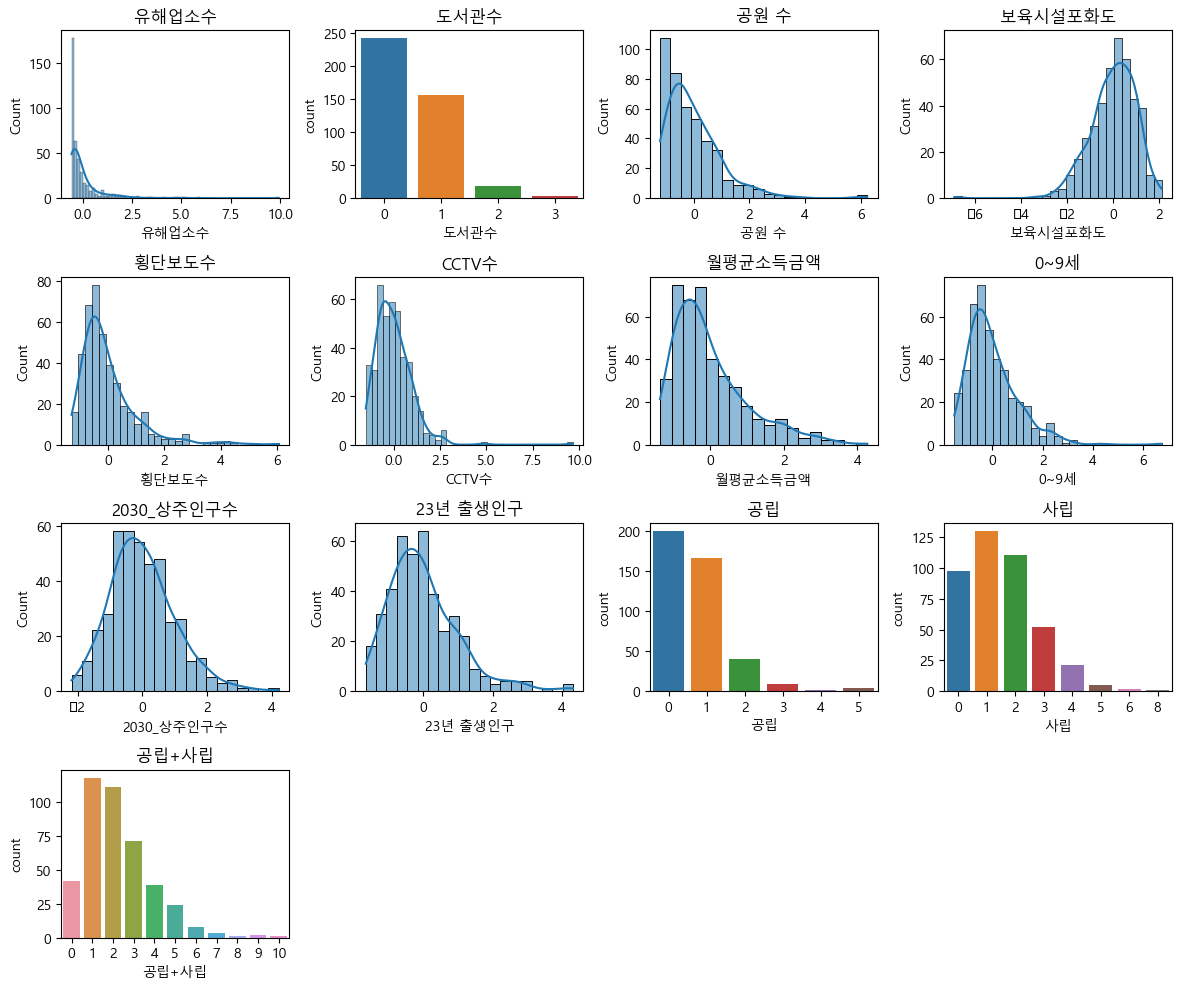

In [260]:
make_plot(df_std, selected_columns)

In [261]:
norm_test(df_std, col_list)

유해업소수 정규성검정
[p_value: 0.0000], [검정통계량: 426.1838] : 정규분포 X

공원 수 정규성검정
[p_value: 0.0000], [검정통계량: 182.8102] : 정규분포 X

보육시설포화도 정규성검정
[p_value: 0.0000], [검정통계량: 116.4345] : 정규분포 X

횡단보도수 정규성검정
[p_value: 0.0000], [검정통계량: 222.4799] : 정규분포 X

CCTV수 정규성검정
[p_value: 0.0000], [검정통계량: 308.5901] : 정규분포 X

월평균소득금액 정규성검정
[p_value: 0.0000], [검정통계량: 94.1512] : 정규분포 X

0~9세 정규성검정
[p_value: 0.0000], [검정통계량: 156.8569] : 정규분포 X

2030_상주인구수 정규성검정
[p_value: 0.0000], [검정통계량: 32.3365] : 정규분포 X

23년 출생인구 정규성검정
[p_value: 0.0000], [검정통계량: 90.9656] : 정규분포 X



### 로그변환

In [262]:
df_log = df.copy()

In [263]:
def log_scale(data):
    return np.log1p(data)

col_list = ['유해업소수', '공원 수', '보육시설포화도', '횡단보도수', 'CCTV수', '월평균소득금액', '0~9세', '2030_상주인구수', '23년 출생인구']


for col in col_list:
    df_log[col] = log_scale(df_log[col])

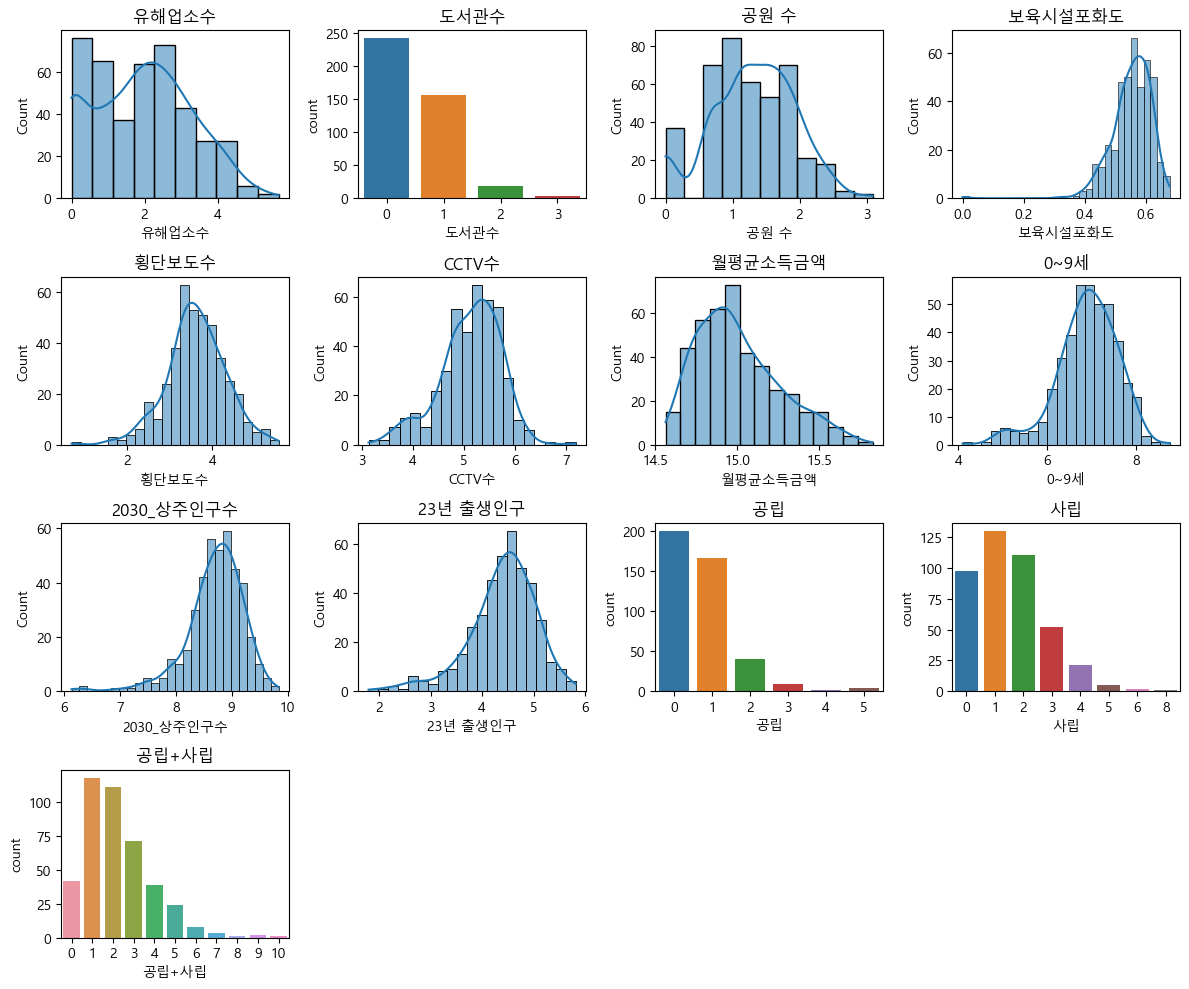

In [264]:
make_plot(df_log, selected_columns)

In [265]:
norm_test(df_log, col_list)

유해업소수 정규성검정
[p_value: 0.0000], [검정통계량: 31.2635] : 정규분포 X

공원 수 정규성검정
[p_value: 0.0792], [검정통계량: 5.0714] : 정규분포 O

보육시설포화도 정규성검정
[p_value: 0.0000], [검정통계량: 218.7298] : 정규분포 X

횡단보도수 정규성검정
[p_value: 0.0026], [검정통계량: 11.8836] : 정규분포 X

CCTV수 정규성검정
[p_value: 0.0000], [검정통계량: 23.8462] : 정규분포 X

월평균소득금액 정규성검정
[p_value: 0.0000], [검정통계량: 30.5799] : 정규분포 X

0~9세 정규성검정
[p_value: 0.0000], [검정통계량: 45.7680] : 정규분포 X

2030_상주인구수 정규성검정
[p_value: 0.0000], [검정통계량: 120.5864] : 정규분포 X

23년 출생인구 정규성검정
[p_value: 0.0000], [검정통계량: 59.3839] : 정규분포 X



공원수 제외, 모두 정규성 충족 x..(당황..)

### Yeo Johnson 변환

In [266]:
df_yeo = df.copy()

In [267]:
from scipy.stats import yeojohnson

col_lst = ['유해업소수', '공원 수', '보육시설포화도', '횡단보도수', 'CCTV수', '월평균소득금액', '0~9세', '2030_상주인구수', '23년 출생인구']

for col in col_lst:
    transformed_data, lambda_value = yeojohnson(df_yeo[col])

    df_yeo[col] = transformed_data

C:\Users\yju12\AppData\Local\Temp\ipykernel_12380\1805220041.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\yju12\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


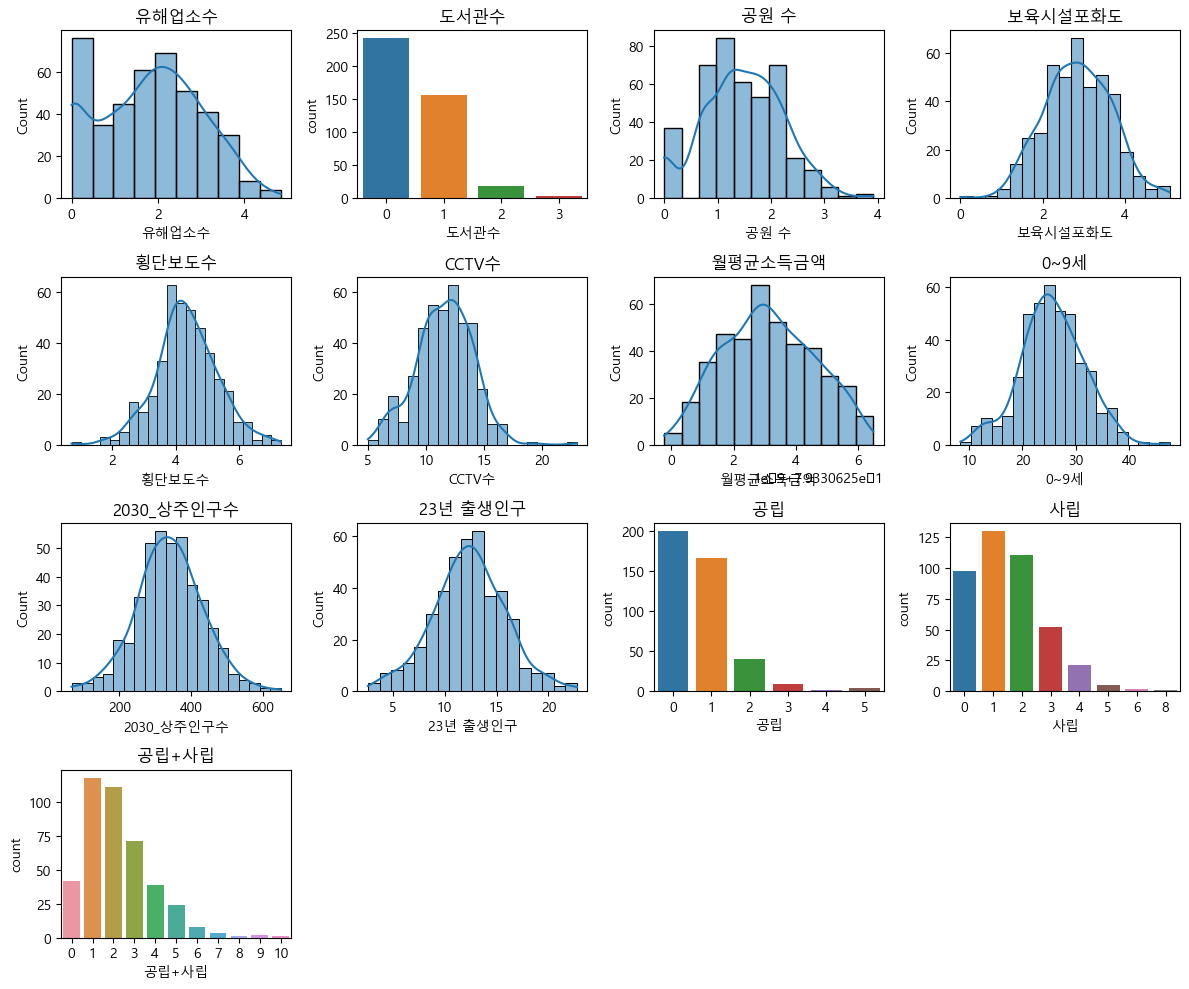

In [268]:
# 스케일링 후 데이터 확인
make_plot(df_yeo, selected_columns)

In [269]:
norm_test(df_yeo, col_list)

유해업소수 정규성검정
[p_value: 0.0000], [검정통계량: 49.4681] : 정규분포 X

공원 수 정규성검정
[p_value: 0.8900], [검정통계량: 0.2332] : 정규분포 O

보육시설포화도 정규성검정
[p_value: 0.9270], [검정통계량: 0.1517] : 정규분포 O

횡단보도수 정규성검정
[p_value: 0.1036], [검정통계량: 4.5342] : 정규분포 O

CCTV수 정규성검정
[p_value: 0.0274], [검정통계량: 7.1942] : 정규분포 X

월평균소득금액 정규성검정
[p_value: 0.0000], [검정통계량: 24.1651] : 정규분포 X

0~9세 정규성검정
[p_value: 0.4393], [검정통계량: 1.6450] : 정규분포 O

2030_상주인구수 정규성검정
[p_value: 0.3323], [검정통계량: 2.2032] : 정규분포 O

23년 출생인구 정규성검정
[p_value: 0.5456], [검정통계량: 1.2118] : 정규분포 O



왜도를 어느정도 보완하여 정규성을 확보한 yeo johnson 변환으로 진행하는것이 좋아보임

## 머신러닝 _ 회귀분석

In [270]:
df_yeo['공립'].value_counts(normalize = True)
# 공립수의 경우에도 object형으로 변환하는것이 좋은듯함
# 일단 그대로 진행 후 object형으로 진행 -> 0개, 1개, 2개, 3개이상

0    0.476190
1    0.395238
2    0.095238
3    0.021429
5    0.009524
4    0.002381
Name: 공립, dtype: float64

- Target : 공립 유치원 수 
- 도서관수는 0개, 1개이상으로 2개의 범주로 변환하여 분석 진행
- 사립유치원 수는 0개, 1개, 2개, 3개이상으로 3개의 범주로 변환하여 분석 진행  
  
- 스케일링은 Train, Test 나눈 후 yeo johnson 정규화 후 minmax스케일러 적용

In [271]:
df_yeo2 = df_yeo.copy()

In [272]:
df_yeo2.drop(columns = ['자치구', '행정동', '공립+사립'], inplace=True)

In [273]:
df_yeo2.head()

,유해업소수,도서관수,공원 수,보육시설포화도,횡단보도수,CCTV수,월평균소득금액,0~9세,2030_상주인구수,23년 출생인구,공립,사립
0,2.904868,2,2.253107,1.586898,5.621904,10.631323,0.793306,18.924239,188.739901,6.650400,0,2
1,1.064668,0,0.000000,2.968822,3.526493,10.771030,0.793306,17.618389,193.836607,5.906271,0,2
2,1.841106,0,1.537813,4.356106,3.648235,10.065072,0.793306,25.002132,280.880202,10.823310,0,1
3,2.832193,0,0.729729,2.641269,5.308559,10.033539,0.793306,25.276788,336.294515,14.007534,1,0
4,3.382672,0,1.192396,4.133077,2.690602,12.600591,0.793306,25.502815,301.867795,13.422538,1,1


In [274]:
df_yeo2['도서관수'] = df_yeo2['도서관수'].apply(lambda x: '0개' if x == 0 else '1개이상')
df_yeo2['사립'] = df_yeo2['사립'].apply(lambda x: '0개' if x == 0 else '1개' if x == 1 else '2개' if x < 3 else '3개이상')
df_yeo2.head()

,유해업소수,도서관수,공원 수,보육시설포화도,횡단보도수,CCTV수,월평균소득금액,0~9세,2030_상주인구수,23년 출생인구,공립,사립
0,2.904868,1개이상,2.253107,1.586898,5.621904,10.631323,0.793306,18.924239,188.739901,6.650400,0,2개
1,1.064668,0개,0.000000,2.968822,3.526493,10.771030,0.793306,17.618389,193.836607,5.906271,0,2개
2,1.841106,0개,1.537813,4.356106,3.648235,10.065072,0.793306,25.002132,280.880202,10.823310,0,1개
3,2.832193,0개,0.729729,2.641269,5.308559,10.033539,0.793306,25.276788,336.294515,14.007534,1,0개
4,3.382672,0개,1.192396,4.133077,2.690602,12.600591,0.793306,25.502815,301.867795,13.422538,1,1개


In [275]:
df_yeo2['도서관수'].value_counts(normalize = True)

0개      0.57619
1개이상    0.42381
Name: 도서관수, dtype: float64

In [276]:
df_yeo2['사립'].value_counts(normalize = True)

1개      0.309524
2개      0.264286
0개      0.233333
3개이상    0.192857
Name: 사립, dtype: float64

In [277]:
df_yeo2

,유해업소수,도서관수,공원 수,보육시설포화도,횡단보도수,CCTV수,월평균소득금액,0~9세,2030_상주인구수,23년 출생인구,공립,사립
0,2.904868,1개이상,2.253107,1.586898,5.621904,10.631323,0.793306,18.924239,188.739901,6.650400,0,2개
1,1.064668,0개,0.000000,2.968822,3.526493,10.771030,0.793306,17.618389,193.836607,5.906271,0,2개
2,1.841106,0개,1.537813,4.356106,3.648235,10.065072,0.793306,25.002132,280.880202,10.823310,0,1개
3,2.832193,0개,0.729729,2.641269,5.308559,10.033539,0.793306,25.276788,336.294515,14.007534,1,0개
4,3.382672,0개,1.192396,4.133077,2.690602,12.600591,0.793306,25.502815,301.867795,13.422538,1,1개
...,...,...,...,...,...,...,...,...,...,...,...,...
415,1.332539,1개이상,0.729729,2.884284,2.571648,8.866124,0.793306,22.484955,196.762868,9.362522,0,0개
416,4.839217,0개,1.815992,1.146888,6.905292,12.700914,0.793306,12.945774,152.593498,4.447884,0,1개
417,0.679531,0개,2.253107,2.563707,4.375912,14.825086,0.793306,24.434810,333.802926,13.117367,0,0개
418,1.960060,1개이상,2.050160,2.340967,4.223828,10.158555,0.793306,20.375954,345.129925,9.267795,0,0개


- 범주형 변수 원핫인코딩

In [278]:
df_1 = pd.get_dummies(df_yeo2['도서관수'], prefix='도서관수')
df_2 = pd.get_dummies(df_yeo2['사립'], prefix='사립')

df_yeo2 = pd.concat([df_yeo2, df_1, df_2], axis=1)

df_yeo2.drop(columns=['도서관수', '사립'], inplace=True)
df_yeo2.head()

,유해업소수,공원 수,보육시설포화도,횡단보도수,CCTV수,월평균소득금액,0~9세,2030_상주인구수,23년 출생인구,공립,도서관수_0개,도서관수_1개이상,사립_0개,사립_1개,사립_2개,사립_3개이상
0,2.904868,2.253107,1.586898,5.621904,10.631323,0.793306,18.924239,188.739901,6.650400,0,0,1,0,0,1,0
1,1.064668,0.000000,2.968822,3.526493,10.771030,0.793306,17.618389,193.836607,5.906271,0,1,0,0,0,1,0
2,1.841106,1.537813,4.356106,3.648235,10.065072,0.793306,25.002132,280.880202,10.823310,0,1,0,0,1,0,0
3,2.832193,0.729729,2.641269,5.308559,10.033539,0.793306,25.276788,336.294515,14.007534,1,1,0,1,0,0,0
4,3.382672,1.192396,4.133077,2.690602,12.600591,0.793306,25.502815,301.867795,13.422538,1,1,0,0,1,0,0


In [279]:
# x, y 분리 
df_X = df_yeo2.drop(columns='공립')
df_y = df_yeo2['공립']

### 데이터 스케일링

In [280]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_X_s = scaler.fit_transform(df_X)

In [281]:
df_y.value_counts(normalize=True)

0    0.476190
1    0.395238
2    0.095238
3    0.021429
5    0.009524
4    0.002381
Name: 공립, dtype: float64

### Train, Test split (test 0.3)

In [282]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_valid, df_y_train, df_y_valid = train_test_split(df_X_s, df_y, test_size = 0.3, random_state = 6)

print(len(df_X_train), len(df_X_valid), len(df_y_train), len(df_y_valid))

294 126 294 126


In [283]:
df_y.value_counts(normalize=True)

0    0.476190
1    0.395238
2    0.095238
3    0.021429
5    0.009524
4    0.002381
Name: 공립, dtype: float64

In [284]:
print(df_y_train.value_counts(normalize=True), df_y_valid.value_counts(normalize=True))
# 데이터 불균형은 어쩔 수 없는듯... (연속형 변수 stratify 불가) -> 일단 진행

0    0.496599
1    0.384354
2    0.088435
3    0.023810
4    0.003401
5    0.003401
Name: 공립, dtype: float64 0    0.428571
1    0.420635
2    0.111111
5    0.023810
3    0.015873
Name: 공립, dtype: float64


### 모델학습 및 평가

In [285]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# 선형 회귀
LR = LinearRegression()
LR.fit(df_X_train, df_y_train)
y_pred_LR = LR.predict(df_X_valid)

# 랜덤 포레스트
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(df_X_train, df_y_train)
y_pred_rf = rf.predict(df_X_valid)

# 릿지 
RG = Ridge(alpha=1.0)
RG.fit(df_X_train, df_y_train)
y_pred_RG = RG.predict(df_X_valid)

# 라쏘
LS = Lasso(alpha=1.0)
LS.fit(df_X_train, df_y_train)
y_pred_LS = LS.predict(df_X_valid)

In [286]:
# pycaret에서 점수가 높았던 ExtraTreesRegressor확인
from sklearn.ensemble import ExtraTreesRegressor 

ETR = ExtraTreesRegressor(n_estimators=100, random_state=1)
ETR.fit(df_X_train, df_y_train)
y_pred_ETR = ETR.predict(df_X_valid)

In [287]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

def score_rate(origin, pred):
    MAE =  round(mean_absolute_error(origin, pred),2)
    MSE = round(mean_squared_error(origin, pred),2)
    RMSE = round(np.sqrt(MSE),2)
    R2 = round(r2_score(origin, pred),2)

    return print(f"MAE:{MAE}\nMSE:{MSE}\nRMSE:{RMSE}\nR2:{R2}")

print("선형회귀")
score_rate(df_y_valid, y_pred_LR)
print("")

print("랜덤포레스트")
score_rate(df_y_valid, y_pred_rf)
print("")

print("릿지")
score_rate(df_y_valid, y_pred_RG)
print("")

print("라쏘")
score_rate(df_y_valid, y_pred_LS)
print("")

print("ETR")
score_rate(df_y_valid, y_pred_ETR)

# 점수가 다들 개판이네 ㄷㄷ 

선형회귀
MAE:0.65
MSE:0.77
RMSE:0.88
R2:0.19

랜덤포레스트
MAE:0.61
MSE:0.59
RMSE:0.77
R2:0.38

릿지
MAE:0.64
MSE:0.76
RMSE:0.87
R2:0.2

라쏘
MAE:0.71
MSE:0.97
RMSE:0.98
R2:-0.02

ETR
MAE:0.61
MSE:0.6
RMSE:0.77
R2:0.36


### 회귀계수 확인

In [288]:
def coef_df(col,coef):
    df = pd.DataFrame({'Feature': col, 'Coefficient': coef})
    df = df.iloc[df['Coefficient'].abs().argsort()[::-1]]
    return df

In [289]:
# 선형회귀
coef_df(df_X.columns, LR.coef_)

,Feature,Coefficient
3,횡단보도수,1.439979
6,0~9세,1.432086
5,월평균소득금액,-0.789626
8,23년 출생인구,0.473126
0,유해업소수,-0.382187
2,보육시설포화도,-0.214748
11,사립_0개,0.146072
7,2030_상주인구수,-0.125700
13,사립_2개,-0.114089
12,사립_1개,-0.072788


In [290]:
# 랜덤 포레스트 -> 블랜딩모델은 회귀계수 제공x, feature_importances 제공 
coef_df(df_X.columns, rf.feature_importances_)

,Feature,Coefficient
6,0~9세,0.227239
3,횡단보도수,0.136383
8,23년 출생인구,0.118704
4,CCTV수,0.093533
7,2030_상주인구수,0.090418
5,월평균소득금액,0.082283
2,보육시설포화도,0.073112
0,유해업소수,0.070724
1,공원 수,0.063101
14,사립_3개이상,0.008292


In [291]:
# 릿지
coef_df(df_X.columns, RG.coef_)

,Feature,Coefficient
3,횡단보도수,1.176402
6,0~9세,0.965278
5,월평균소득금액,-0.610230
8,23년 출생인구,0.587930
0,유해업소수,-0.362155
2,보육시설포화도,-0.131924
11,사립_0개,0.131325
13,사립_2개,-0.109924
1,공원 수,0.080219
12,사립_1개,-0.074621


In [292]:
# 라쏘
coef_df(df_X.columns, LS.coef_)

,Feature,Coefficient
14,사립_3개이상,0.0
13,사립_2개,-0.0
12,사립_1개,-0.0
11,사립_0개,-0.0
10,도서관수_1개이상,0.0
9,도서관수_0개,-0.0
8,23년 출생인구,0.0
7,2030_상주인구수,0.0
6,0~9세,0.0
5,월평균소득금액,-0.0


In [293]:
# ETR -> 블랜딩모델은 회귀계수 제공x, feature_importances 제공 
coef_df(df_X.columns, ETR.feature_importances_)

,Feature,Coefficient
6,0~9세,0.167381
8,23년 출생인구,0.128961
3,횡단보도수,0.109928
1,공원 수,0.090085
4,CCTV수,0.087558
2,보육시설포화도,0.078263
5,월평균소득금액,0.071328
0,유해업소수,0.070856
7,2030_상주인구수,0.070011
14,사립_3개이상,0.030761


### auto ML (pycaret) 회귀분석

In [294]:
from pycaret.regression import *

In [295]:
df_yeo2

,유해업소수,공원 수,보육시설포화도,횡단보도수,CCTV수,월평균소득금액,0~9세,2030_상주인구수,23년 출생인구,공립,도서관수_0개,도서관수_1개이상,사립_0개,사립_1개,사립_2개,사립_3개이상
0,2.904868,2.253107,1.586898,5.621904,10.631323,0.793306,18.924239,188.739901,6.650400,0,0,1,0,0,1,0
1,1.064668,0.000000,2.968822,3.526493,10.771030,0.793306,17.618389,193.836607,5.906271,0,1,0,0,0,1,0
2,1.841106,1.537813,4.356106,3.648235,10.065072,0.793306,25.002132,280.880202,10.823310,0,1,0,0,1,0,0
3,2.832193,0.729729,2.641269,5.308559,10.033539,0.793306,25.276788,336.294515,14.007534,1,1,0,1,0,0,0
4,3.382672,1.192396,4.133077,2.690602,12.600591,0.793306,25.502815,301.867795,13.422538,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1.332539,0.729729,2.884284,2.571648,8.866124,0.793306,22.484955,196.762868,9.362522,0,0,1,1,0,0,0
416,4.839217,1.815992,1.146888,6.905292,12.700914,0.793306,12.945774,152.593498,4.447884,0,1,0,0,1,0,0
417,0.679531,2.253107,2.563707,4.375912,14.825086,0.793306,24.434810,333.802926,13.117367,0,1,0,1,0,0,0
418,1.960060,2.050160,2.340967,4.223828,10.158555,0.793306,20.375954,345.129925,9.267795,0,0,1,1,0,0,0


- 컬럼명 영문 변환(그래프 확인시 필요)

In [297]:
df_yeo_new = df_yeo2.copy()
df_yeo_new.columns = ['danger_cnt', 'park_cnt', 'kinderGD_range', 'cross_cnt', 'CCTV_cnt',
                      'avg_income', '0~9age', '2030age', '23birth', 'target', 'lb_0cnt', 'lb_1cnt', 
                      'kndrGD_0cnt', 'kndrGD_1cnt', 'kndrGD_2cnt', 'kndrGD_3cnt']
df_yeo_new

,danger_cnt,park_cnt,kinderGD_range,cross_cnt,CCTV_cnt,avg_income,0~9age,2030age,23birth,target,lb_0cnt,lb_1cnt,kndrGD_0cnt,kndrGD_1cnt,kndrGD_2cnt,kndrGD_3cnt
0,2.904868,2.253107,1.586898,5.621904,10.631323,0.793306,18.924239,188.739901,6.650400,0,0,1,0,0,1,0
1,1.064668,0.000000,2.968822,3.526493,10.771030,0.793306,17.618389,193.836607,5.906271,0,1,0,0,0,1,0
2,1.841106,1.537813,4.356106,3.648235,10.065072,0.793306,25.002132,280.880202,10.823310,0,1,0,0,1,0,0
3,2.832193,0.729729,2.641269,5.308559,10.033539,0.793306,25.276788,336.294515,14.007534,1,1,0,1,0,0,0
4,3.382672,1.192396,4.133077,2.690602,12.600591,0.793306,25.502815,301.867795,13.422538,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1.332539,0.729729,2.884284,2.571648,8.866124,0.793306,22.484955,196.762868,9.362522,0,0,1,1,0,0,0
416,4.839217,1.815992,1.146888,6.905292,12.700914,0.793306,12.945774,152.593498,4.447884,0,1,0,0,1,0,0
417,0.679531,2.253107,2.563707,4.375912,14.825086,0.793306,24.434810,333.802926,13.117367,0,1,0,1,0,0,0
418,1.960060,2.050160,2.340967,4.223828,10.158555,0.793306,20.375954,345.129925,9.267795,0,0,1,1,0,0,0


In [298]:
df_yeo_new_train = df_yeo_new.iloc[:int(len(df_yeo_new)*0.7)]
df_yeo_new_test = df_yeo_new.iloc[int(len(df_yeo_new)*0.7):]

print(len(df_yeo_new_train), len(df_yeo_new_test))

294 126


In [299]:
# PyCaret 설정
exp_reg = setup(data = df_yeo_new_train, 
                test_data = df_yeo_new_test,
                target='target',
                session_id=0)

,Description,Value
0,Session id,0
1,Target,target
2,Target type,Regression
3,Original data shape,"(420, 16)"
4,Transformed data shape,"(420, 16)"
5,Transformed train set shape,"(294, 16)"
6,Transformed test set shape,"(126, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [300]:
# 모델확인
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [301]:
# 모델 훈련 
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6478,0.6214,0.7762,0.0669,0.4378,0.4329,0.0470
et,Extra Trees Regressor,0.6419,0.6287,0.7786,0.0573,0.4392,0.4185,0.0390
gbr,Gradient Boosting Regressor,0.6427,0.6378,0.7862,0.0253,0.4437,0.4710,0.0200
ada,AdaBoost Regressor,0.6521,0.6733,0.8018,0.0215,0.4629,0.2913,0.0150
lasso,Lasso Regression,0.6534,0.7407,0.8268,0.0160,0.4434,0.3888,0.4420
llar,Lasso Least Angle Regression,0.6534,0.7407,0.8268,0.0160,0.4434,0.3888,0.0070
omp,Orthogonal Matching Pursuit,0.6537,0.7401,0.8267,0.0148,0.4435,0.3923,0.0070
en,Elastic Net,0.6548,0.7419,0.8288,0.0005,0.4462,0.3918,0.0060
huber,Huber Regressor,0.6471,0.7306,0.8314,-0.0181,0.4381,0.4519,0.0090
br,Bayesian Ridge,0.6571,0.7516,0.8360,-0.0464,0.4506,0.4156,0.0070


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [302]:
best_model

RandomForestRegressor(n_jobs=-1, random_state=0)

In [303]:
# 모델 세부 튜닝
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6188,0.5121,0.7156,0.1606,0.4007,0.5065
1,0.5825,0.5844,0.7645,0.4572,0.3871,0.4047
2,0.6495,0.5632,0.7505,0.3501,0.4007,0.4152
3,0.8708,1.2748,1.1290,0.4365,0.4859,0.4116
4,0.5069,0.3041,0.5514,0.0457,0.3697,0.4396
5,0.5804,0.4456,0.6675,0.3211,0.4282,0.2804
6,0.7368,0.7183,0.8475,0.0288,0.4810,0.4662
7,0.5146,0.3165,0.5626,0.2687,0.3613,0.3712
8,0.6307,0.6279,0.7924,-0.0436,0.4216,0.4127


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [304]:
tuned_model

RandomForestRegressor(max_depth=5, max_features='sqrt',
                      min_impurity_decrease=0.005, min_samples_leaf=2,
                      min_samples_split=7, n_estimators=60, n_jobs=-1,
                      random_state=0)

In [305]:
# 모델 예측값 확인
prediction = predict_model(tuned_model)
prediction

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.5996,0.4568,0.6758,0.1501,0.4189,0.4142


,danger_cnt,park_cnt,kinderGD_range,cross_cnt,CCTV_cnt,avg_income,0~9age,2030age,23birth,lb_0cnt,lb_1cnt,kndrGD_0cnt,kndrGD_1cnt,kndrGD_2cnt,kndrGD_3cnt,target,prediction_label
294,-0.000000,2.740717,3.515146,6.328421,11.825636,0.793306,36.537941,430.098480,11.056873,0,1,0,0,0,1,3,2.013338
295,2.064231,1.815992,2.968822,4.009845,10.370503,0.793306,38.530384,498.276703,22.603062,0,1,1,0,0,0,1,2.500209
296,1.960060,0.729729,2.413582,2.996408,9.905479,0.793306,24.812744,352.477295,12.478136,0,1,0,1,0,0,1,0.618219
297,1.064668,3.000029,3.055175,2.571648,14.345389,0.793306,28.349886,505.267365,13.777373,1,0,0,0,0,1,1,1.558182
298,1.537289,1.537813,3.055175,2.441389,9.905479,0.793306,23.300207,308.191223,9.995634,1,0,0,0,1,0,0,0.454879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1.332539,0.729729,2.884284,2.571648,8.866124,0.793306,22.484955,196.762863,9.362522,0,1,1,0,0,0,0,0.491992
416,4.839217,1.815992,1.146888,6.905292,12.700913,0.793306,12.945774,152.593491,4.447884,1,0,0,1,0,0,0,0.672956
417,0.679531,2.253107,2.563707,4.375912,14.825087,0.793306,24.434811,333.802917,13.117368,1,0,1,0,0,0,0,0.747515
418,1.960060,2.050160,2.340967,4.223827,10.158555,0.793306,20.375954,345.129913,9.267795,0,1,1,0,0,0,0,0.623598


In [306]:
# 최종 모델 학습
final_model = finalize_model(tuned_model)

In [309]:
# 모델 평가
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## 머신러닝 _분류분석

- Target : 공립 유치원 수 -> 범주형으로 변환하여 진행
    - 0개, 1개, 2개, 3개이상
- 도서관수는 0개, 1개이상으로 2개의 범주로 변환하여 분석 진행
- 사립유치원 수는 0개, 1개, 2개, 3개이상으로 3개의 범주로 변환하여 분석 진행  
  
- 스케일링은 Train, Test 나눈 후 yeo johnson 정규화 후 minmax스케일러 적용

In [310]:
df_yeo3 = df_yeo2.copy()

In [311]:
df_yeo3['공립'].value_counts(normalize = True)

0    0.476190
1    0.395238
2    0.095238
3    0.021429
5    0.009524
4    0.002381
Name: 공립, dtype: float64

In [312]:
df_yeo3.head()

,유해업소수,공원 수,보육시설포화도,횡단보도수,CCTV수,월평균소득금액,0~9세,2030_상주인구수,23년 출생인구,공립,도서관수_0개,도서관수_1개이상,사립_0개,사립_1개,사립_2개,사립_3개이상
0,2.904868,2.253107,1.586898,5.621904,10.631323,0.793306,18.924239,188.739901,6.650400,0,0,1,0,0,1,0
1,1.064668,0.000000,2.968822,3.526493,10.771030,0.793306,17.618389,193.836607,5.906271,0,1,0,0,0,1,0
2,1.841106,1.537813,4.356106,3.648235,10.065072,0.793306,25.002132,280.880202,10.823310,0,1,0,0,1,0,0
3,2.832193,0.729729,2.641269,5.308559,10.033539,0.793306,25.276788,336.294515,14.007534,1,1,0,1,0,0,0
4,3.382672,1.192396,4.133077,2.690602,12.600591,0.793306,25.502815,301.867795,13.422538,1,1,0,0,1,0,0


In [313]:
df_yeo3['공립'] = df_yeo3['공립'].apply(lambda x: '0개' if x == 0 else '1개' if x == 1 else '2개이상' if x >= 2 else '0개')

In [314]:
df_yeo3['공립'].value_counts(normalize = True)

0개      0.476190
1개      0.395238
2개이상    0.128571
Name: 공립, dtype: float64

In [315]:
# x, y 분리 
df_X = df_yeo3.drop(columns='공립')
df_y = df_yeo3['공립']

In [316]:
display(df_X.head(), df_y.head())

,유해업소수,공원 수,보육시설포화도,횡단보도수,CCTV수,월평균소득금액,0~9세,2030_상주인구수,23년 출생인구,도서관수_0개,도서관수_1개이상,사립_0개,사립_1개,사립_2개,사립_3개이상
0,2.904868,2.253107,1.586898,5.621904,10.631323,0.793306,18.924239,188.739901,6.650400,0,1,0,0,1,0
1,1.064668,0.000000,2.968822,3.526493,10.771030,0.793306,17.618389,193.836607,5.906271,1,0,0,0,1,0
2,1.841106,1.537813,4.356106,3.648235,10.065072,0.793306,25.002132,280.880202,10.823310,1,0,0,1,0,0
3,2.832193,0.729729,2.641269,5.308559,10.033539,0.793306,25.276788,336.294515,14.007534,1,0,1,0,0,0
4,3.382672,1.192396,4.133077,2.690602,12.600591,0.793306,25.502815,301.867795,13.422538,1,0,0,1,0,0


0    0개
1    0개
2    0개
3    1개
4    1개
Name: 공립, dtype: object

### 데이터 스케일링

In [317]:
# 회귀분석에 사용한 그대로 사용
df_X_s

array([[0.60027658, 0.57566998, 0.31238536, ..., 0.        , 1.        ,
        0.        ],
       [0.22000839, 0.        , 0.58442104, ..., 0.        , 1.        ,
        0.        ],
       [0.38045545, 0.39291202, 0.85751179, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.14042161, 0.57566998, 0.50467284, ..., 0.        , 0.        ,
        0.        ],
       [0.40503671, 0.52381697, 0.46082602, ..., 0.        , 0.        ,
        0.        ],
       [0.63844939, 0.30465777, 0.61878113, ..., 0.        , 1.        ,
        0.        ]])

### Train, Test split (test0.3)

In [318]:
# 회귀와 달리 stratify 사용, 같은 비율로 ...

df_X_train, df_X_valid, df_y_train, df_y_valid = train_test_split(df_X_s, df_y, test_size = 0.3, stratify = df_y, random_state = 6)
print(len(df_X_train), len(df_X_valid), len(df_y_train), len(df_y_valid))

294 126 294 126


In [319]:
df_y_train.value_counts(normalize=True)

0개      0.476190
1개      0.394558
2개이상    0.129252
Name: 공립, dtype: float64

In [320]:
df_y_valid.value_counts(normalize=True)


0개      0.476190
1개      0.396825
2개이상    0.126984
Name: 공립, dtype: float64

### 모델 학습 및 평가

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 로지스틱 회귀
LR = LogisticRegression(random_state=1)
LR.fit(df_X_train, df_y_train)
predictions_LR = LR.predict(df_X_valid)

# Decision Tree
DT = DecisionTreeClassifier(random_state=1)
DT.fit(df_X_train, df_y_train)
predictions_DT = DT.predict(df_X_valid)

# 랜덤포레스트
RF = RandomForestClassifier(random_state=1)
RF.fit(df_X_train, df_y_train)
predictions_RF = RF.predict(df_X_valid)

# SVM
SVM = SVC(random_state=1, kernel='linear')
SVM.fit(df_X_train, df_y_train)
predictions_SVM = SVM.predict(df_X_valid)

In [322]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 샘플수가 다르므로 average 값은 weighted 사용

def score_rate2(y_test, predictions):
    accuracy = round(accuracy_score(y_test, predictions),2)
    precision = round(precision_score(y_test, predictions, average='weighted'),2)
    recall = round(recall_score(y_test, predictions, average='weighted'),2)
    f1 = round(f1_score(y_test, predictions, average='weighted'),2)


    return print(f"accuracy:{accuracy}\nprecision:{precision}\nrecall:{recall}\nf1:{f1}")

In [323]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

- 로지스틱 회귀

accuracy:0.52
precision:0.51
recall:0.52
f1:0.49


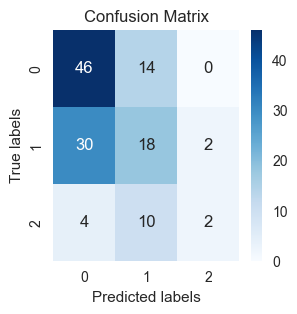

In [324]:
score_rate2(df_y_valid, predictions_LR)
plot_confusion_matrix(df_y_valid, predictions_LR)

- Decision Tree

accuracy:0.4
precision:0.4
recall:0.4
f1:0.4


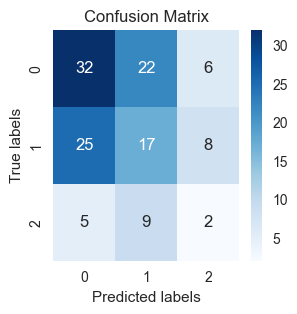

In [325]:
score_rate2(df_y_valid, predictions_DT)
plot_confusion_matrix(df_y_valid, predictions_DT)

- 랜덤포레스트

accuracy:0.55
precision:0.55
recall:0.55
f1:0.51


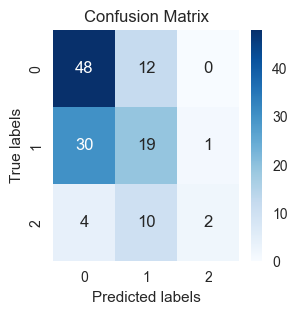

In [326]:
score_rate2(df_y_valid, predictions_RF)
plot_confusion_matrix(df_y_valid, predictions_RF)

- SVM

accuracy:0.49
precision:0.42
recall:0.49
f1:0.45


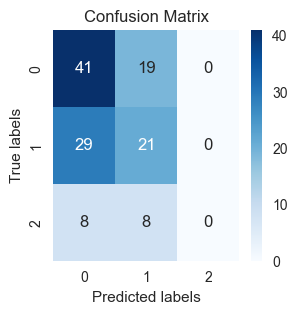

In [327]:
score_rate2(df_y_valid, predictions_SVM)
plot_confusion_matrix(df_y_valid, predictions_SVM)

### 회귀계수 확인

In [328]:
# 로지스틱 회귀
# 클래스별 회귀계수가 다르게 출력
LR_imp = LR.coef_
LR_imp
display(coef_df(df_X.columns, LR_imp[0]), coef_df(df_X.columns, LR_imp[1]), coef_df(df_X.columns, LR_imp[2]))

,Feature,Coefficient
6,0~9세,-1.151757
8,23년 출생인구,-0.819857
7,2030_상주인구수,-0.738411
3,횡단보도수,-0.424113
5,월평균소득금액,0.406090
4,CCTV수,-0.388283
11,사립_0개,-0.323683
0,유해업소수,0.305463
1,공원 수,-0.268799
2,보육시설포화도,0.258458


,Feature,Coefficient
3,횡단보도수,-0.760282
2,보육시설포화도,-0.607371
4,CCTV수,0.464399
1,공원 수,-0.453967
0,유해업소수,-0.210415
7,2030_상주인구수,-0.179052
11,사립_0개,0.171915
8,23년 출생인구,0.161613
12,사립_1개,-0.145734
6,0~9세,0.129708


,Feature,Coefficient
3,횡단보도수,1.184395
6,0~9세,1.022049
7,2030_상주인구수,0.917463
1,공원 수,0.722766
8,23년 출생인구,0.658244
2,보육시설포화도,0.348913
5,월평균소득금액,-0.288403
13,사립_2개,-0.243117
11,사립_0개,0.151768
14,사립_3개이상,0.121750


In [329]:
# DT feature_importances_
DT_imp = DT.feature_importances_
coef_df(df_X.columns, DT_imp)

,Feature,Coefficient
2,보육시설포화도,0.178852
4,CCTV수,0.148203
6,0~9세,0.143934
5,월평균소득금액,0.125211
7,2030_상주인구수,0.089718
3,횡단보도수,0.085282
0,유해업소수,0.074484
8,23년 출생인구,0.057042
1,공원 수,0.051599
10,도서관수_1개이상,0.013727


In [330]:
# 랜덤포레스트 feature_importances_
RF_imp = RF.feature_importances_
coef_df(df_X.columns, RF_imp)

,Feature,Coefficient
6,0~9세,0.129860
8,23년 출생인구,0.112731
7,2030_상주인구수,0.109888
4,CCTV수,0.103637
3,횡단보도수,0.101935
5,월평균소득금액,0.100390
0,유해업소수,0.097874
2,보육시설포화도,0.090751
1,공원 수,0.067690
9,도서관수_0개,0.016523


In [331]:
# SVM 
# 클래스별 회귀계수가 다르게 출력
SVM_imp = SVM.coef_
SVM_imp
display(coef_df(df_X.columns, SVM_imp[0]), coef_df(df_X.columns, SVM_imp[1]), coef_df(df_X.columns, SVM_imp[2]))

,Feature,Coefficient
6,0~9세,-1.274359
8,23년 출생인구,-0.905091
4,CCTV수,-0.757553
11,사립_0개,-0.694811
12,사립_1개,0.658582
2,보육시설포화도,0.641931
13,사립_2개,0.635222
14,사립_3개이상,-0.598992
0,유해업소수,0.598043
5,월평균소득금액,0.520358


,Feature,Coefficient
6,0~9세,-1.377196
3,횡단보도수,-1.112438
8,23년 출생인구,-1.025222
1,공원 수,-0.709898
7,2030_상주인구수,-0.632100
2,보육시설포화도,-0.606610
5,월평균소득금액,0.566193
4,CCTV수,0.270150
13,사립_2개,0.219408
11,사립_0개,-0.211179


,Feature,Coefficient
3,횡단보도수,-0.412453
6,0~9세,-0.379511
7,2030_상주인구수,-0.237983
8,23년 출생인구,0.131038
4,CCTV수,0.115275
1,공원 수,-0.105183
2,보육시설포화도,-0.100764
5,월평균소득금액,0.086857
12,사립_1개,-0.075565
13,사립_2개,0.064769
